# test-3

From big test comaprison table with 10 plots.

LogCircular 1:10 - point GO

19 dic 2024

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0    7584    7742 3.5674313951e+00 2.9288584660e-02 9.0638885160e+02   
1      1   11535   11931 1.0155633079e+00 1.4522620770e-02 6.6968378156e+02   
2      2   23913   24864 3.2732014337e-01 6.5140158999e-03 4.7731501633e+02   
3      3   56373   58050 5.7056539290e-02 4.2679951685e-03 3.3662486719e+02   
4      4  138900  142451 4.7108459316e-02 1.8963100208e-03 2.2626399475e+02   
5      5  322383  329550 2.2762782488e-02 1.0314324967e-03 1.5004947121e+02   

      std FLUX err          est err   Cons. FLUX err  
0 4.5994602189e+03 4.7055657839e+00 4.1031247000e+01  
1 2.3962532882e+03 1.8873780109e+00 2.4720842000e+01  
2 1.6447074090e+03 8.0409351489e-01 4.4373750000e+00  
3 1.0413606659e+03 3.1162996494e-01 1.4335660000e+01  
4 6.7367986749e+02 1.3852831896e-01 1.2001085000e+01  
5 5.1070124179e+02 6.4742408850e-02 9.6129370000e+00  


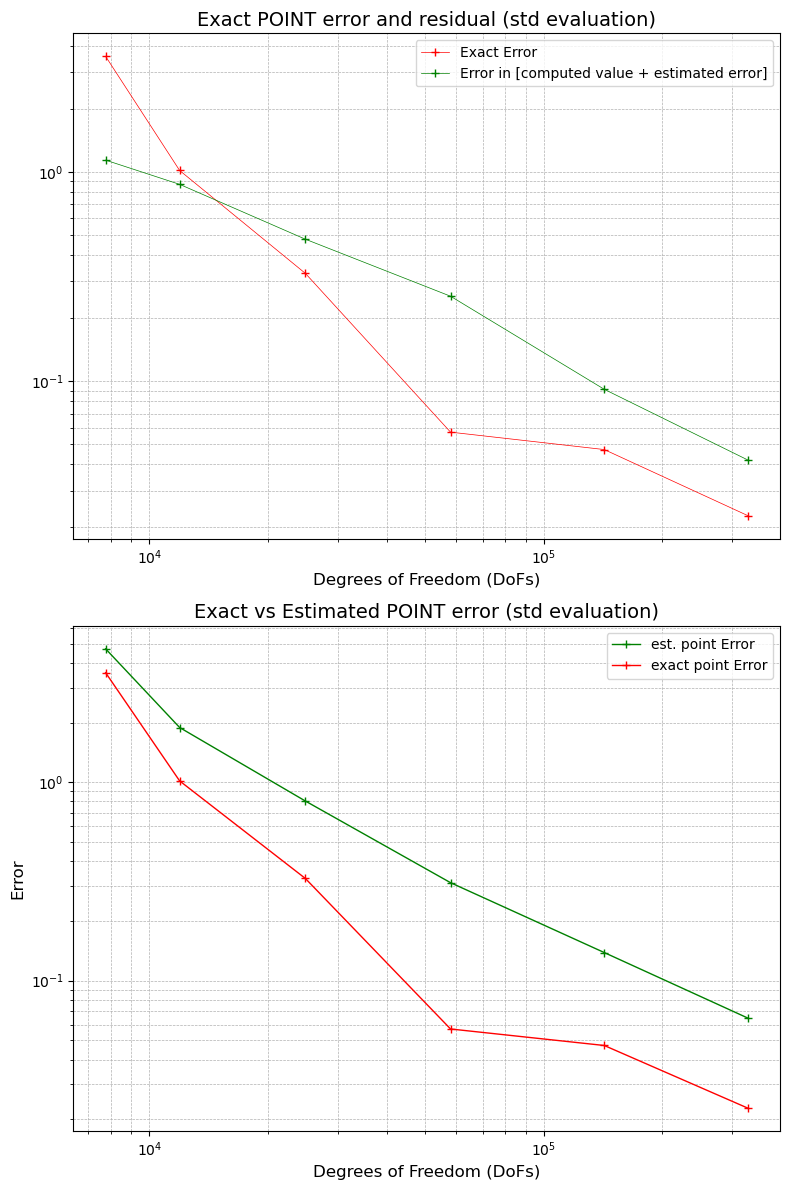

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


# Load the data from the CSV file
file_name = "./results/convergence_results.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
#data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact POINT error and residual (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='est. point Error')
plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='exact point Error')


plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated POINT error (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
